# Extração

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df = pd.json_normalize(df.to_dict(orient="records"))

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Transformação

## Reorganização das colunas

In [ ]:
df.set_index('customerID', inplace=True)

In [ ]:
novos_nomes = {}

for i, column in enumerate(df.columns):
    partes = column.split('.')
    novo_nome = '.'.join(partes[1:]) if len(partes) > 1 else partes[0]
    novos_nomes[column] = novo_nome

df.rename(columns=novos_nomes, inplace=True)

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Conhecendo o dataset

In [ ]:
df.duplicated().sum()

np.int64(22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null 

In [ ]:
for i, column in enumerate(df.loc[:, 'Churn':'Dependents']):
    print(f'{df[column].drop_duplicates()}\n')

for i, column in enumerate(df.loc[:, 'PhoneService':'PaymentMethod']):
    print(f'{df[column].drop_duplicates()}\n')

customerID
0002-ORFBO     No
0004-TLHLJ    Yes
0047-ZHDTW       
Name: Churn, dtype: object

customerID
0002-ORFBO    Female
0003-MKNFE      Male
Name: gender, dtype: object

customerID
0002-ORFBO    0
0011-IGKFF    1
Name: SeniorCitizen, dtype: int64

customerID
0002-ORFBO    Yes
0003-MKNFE     No
Name: Partner, dtype: object

customerID
0002-ORFBO    Yes
0003-MKNFE     No
Name: Dependents, dtype: object

customerID
0002-ORFBO    Yes
0017-DINOC     No
Name: PhoneService, dtype: object

customerID
0002-ORFBO                  No
0003-MKNFE                 Yes
0017-DINOC    No phone service
Name: MultipleLines, dtype: object

customerID
0002-ORFBO            DSL
0004-TLHLJ    Fiber optic
0023-UYUPN             No
Name: InternetService, dtype: object

customerID
0002-ORFBO                     No
0013-SMEOE                    Yes
0023-UYUPN    No internet service
Name: OnlineSecurity, dtype: object

customerID
0002-ORFBO                    Yes
0003-MKNFE                     No
0023-UYUPN  

## Padronização e transformação dos dados

In [ ]:
df.drop(df[df['Churn'] == ''].index, inplace=True)

print(f'{df["Churn"].drop_duplicates()}\n')

customerID
0002-ORFBO     No
0004-TLHLJ    Yes
Name: Churn, dtype: object



In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: True, 0: False})
df['Partner'] = df['Partner'].map({'Yes': True, 'No': False})
df['Dependents'] = df['Dependents'].map({'Yes': True, 'No': False})

df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})
df['PhoneService'] = df['PhoneService'].map({'Yes': True, 'No': False})

df['MultipleLines'] = df['MultipleLines'].map({'Yes': True, 'No': False, 'No phone service': False})

df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': True, 'No': False, 'No internet service': False})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': True, 'No': False, 'No internet service': False})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': True, 'No': False, 'No internet service': False})
df['TechSupport'] = df['TechSupport'].map({'Yes': True, 'No': False, 'No internet service': False})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': True, 'No': False, 'No internet service': False})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': True, 'No': False, 'No internet service': False})

df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': True, 'No': False})

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.6,593.3
0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.4
0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.4


In [ ]:
df.drop(df[df['Charges.Total'] == ' '].index, inplace=True)

In [ ]:
df['Charges.Total'] = df['Charges.Total'].astype(float)

## Coluna das contas diárias

In [ ]:
df['Contas_Diarias'] = round(df['Charges.Monthly'] / 30, 2)

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,False,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.19
0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,False,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,2.00
0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,False,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.46
0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.27
0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,False,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   bool   
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   bool   
 4   Dependents        7032 non-null   bool   
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   bool   
 7   MultipleLines     7032 non-null   bool   
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   bool   
 10  OnlineBackup      7032 non-null   bool   
 11  DeviceProtection  7032 non-null   bool   
 12  TechSupport       7032 non-null   bool   
 13  StreamingTV       7032 non-null   bool   
 14  StreamingMovies   7032 non-null   bool   
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null 

In [ ]:
for i, column in enumerate(df.loc[:, 'Churn':'Dependents']):
    print(f'{df[column].drop_duplicates()}\n')

for i, column in enumerate(df.loc[:, 'PhoneService':'PaymentMethod']):
    print(f'{df[column].drop_duplicates()}\n')

customerID
0002-ORFBO    False
0004-TLHLJ     True
Name: Churn, dtype: bool

customerID
0002-ORFBO    Female
0003-MKNFE      Male
Name: gender, dtype: object

customerID
0002-ORFBO    False
0011-IGKFF     True
Name: SeniorCitizen, dtype: bool

customerID
0002-ORFBO     True
0003-MKNFE    False
Name: Partner, dtype: bool

customerID
0002-ORFBO     True
0003-MKNFE    False
Name: Dependents, dtype: bool

customerID
0002-ORFBO     True
0017-DINOC    False
Name: PhoneService, dtype: bool

customerID
0002-ORFBO    False
0003-MKNFE     True
Name: MultipleLines, dtype: bool

customerID
0002-ORFBO            DSL
0004-TLHLJ    Fiber optic
0023-UYUPN             No
Name: InternetService, dtype: object

customerID
0002-ORFBO    False
0013-SMEOE     True
Name: OnlineSecurity, dtype: bool

customerID
0002-ORFBO     True
0003-MKNFE    False
Name: OnlineBackup, dtype: bool

customerID
0002-ORFBO    False
0004-TLHLJ     True
Name: DeviceProtection, dtype: bool

customerID
0002-ORFBO     True
0003-MKNFE

# Análise

## Cálculo de índices

Aqui é onde são feitos todos os cálculos dos índices utilizados durante a análise da distribuição da evasão.

### Média, mediana e desvio padrão de Custos mensais

In [ ]:
media_mensal = df['Charges.Monthly'].mean()
mediana_mensal = df['Charges.Monthly'].median()
desvio_mensal = df['Charges.Monthly'].std()

print(f'Média dos custos mensais: {media_mensal:.2f}')
print(f'Mediana dos custos mensais: {mediana_mensal}')
print(f'Desvio padrão dos custos mensais: {desvio_mensal:.2f}')

Média dos custos mensais: 64.80
Mediana dos custos mensais: 70.35
Desvio padrão dos custos mensais: 30.09


### Média, mediana e desvio padrão dos Meses de contrato

In [ ]:
media_contrato = df['tenure'].mean()
mediana_contrato = df['tenure'].median()
desvio_contrato = df['tenure'].std()

print(f'Média dos meses de contratação: {np.round(media_contrato).astype(int)}')
print(f'Mediana dos meses de contratação: {int(mediana_contrato)}')
print(f'Desvio padrão dos meses de contratação: {np.round(desvio_contrato).astype(int)}')

Média dos meses de contratação: 32
Mediana dos meses de contratação: 29
Desvio padrão dos meses de contratação: 25


## Distribuição da evasão

Aqui vamos entender a distribuição da evasão (Churn).
Nosso objetivo aqui é entender como essa variável está distribuída entre os clientes.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
evasao = df['Churn'].map({False: 'Não deixou', True: 'Deixou'})

### Contagem de Evasão por Variáveis Categóricas

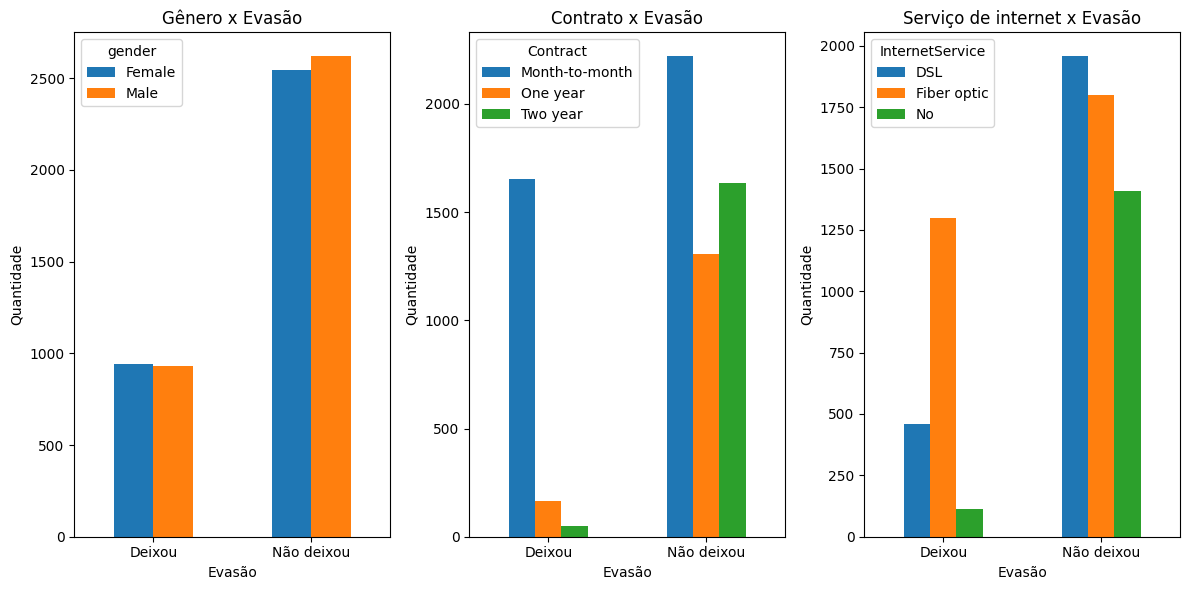

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

evasao_genero = ['Gênero', pd.crosstab(evasao, df['gender'])]
evasao_contrato = ['Contrato', pd.crosstab(evasao, df['Contract'])]
evasao_internet = ['Serviço de internet', pd.crosstab(evasao, df['InternetService'])]

evasoes = [evasao_genero, evasao_contrato, evasao_internet]

for ax, (coluna, ct) in zip(axes, evasoes):
    ct.plot(kind='bar', ax=ax)
    ax.set_title(coluna + ' x Evasão')
    ax.set_xlabel('Evasão')
    ax.set_ylabel('Quantidade')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

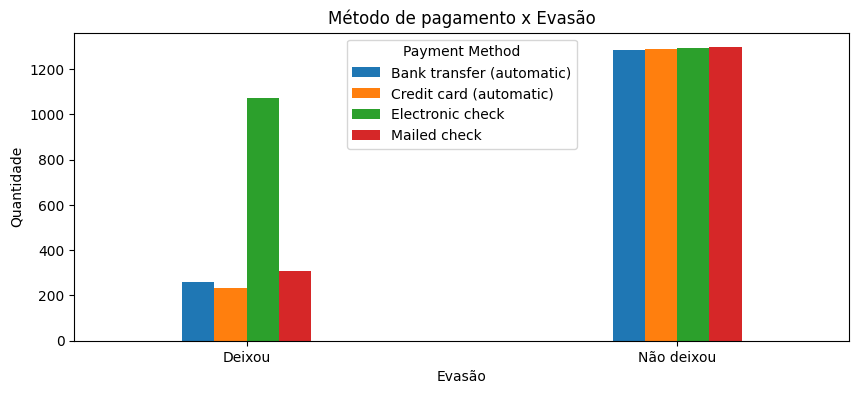

In [ ]:
evasao_pagamento = pd.crosstab(evasao, df['PaymentMethod'])

evasao_pagamento.plot(kind='bar', figsize=(10, 4), width=0.3)
plt.title('Método de pagamento x Evasão')
plt.xlabel('Evasão')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

plt.legend(title='Payment Method', loc='upper center')
plt.show()

### Contagem de Evasão por Variáveis Numéricas (Gasto)

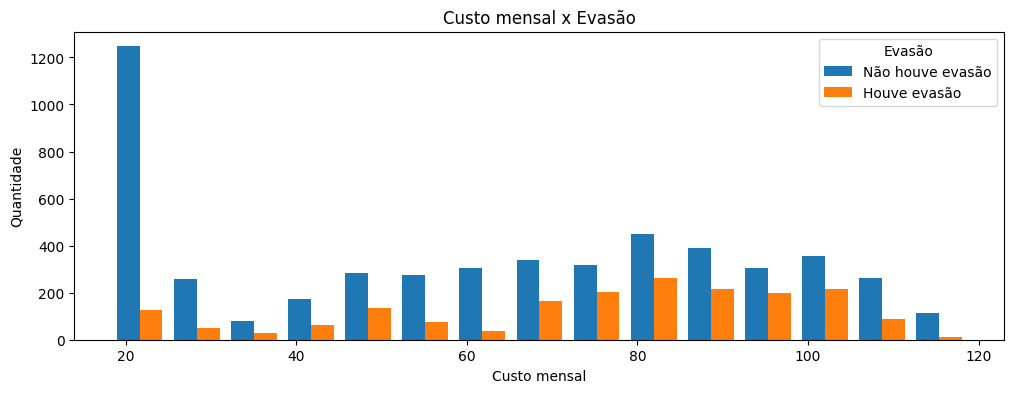

In [ ]:
evasao_mensal_nao = df[df['Churn'] == False]['Charges.Monthly']
evasao_mensal_sim = df[df['Churn'] == True]['Charges.Monthly']

plt.figure(figsize=(12,4))

plt.hist([evasao_mensal_nao, evasao_mensal_sim], bins=15, label=['Não houve evasão', 'Houve evasão'])
plt.xlabel('Custo mensal')
plt.ylabel('Quantidade')
plt.title('Custo mensal x Evasão')
plt.legend(title='Evasão')

plt.show()

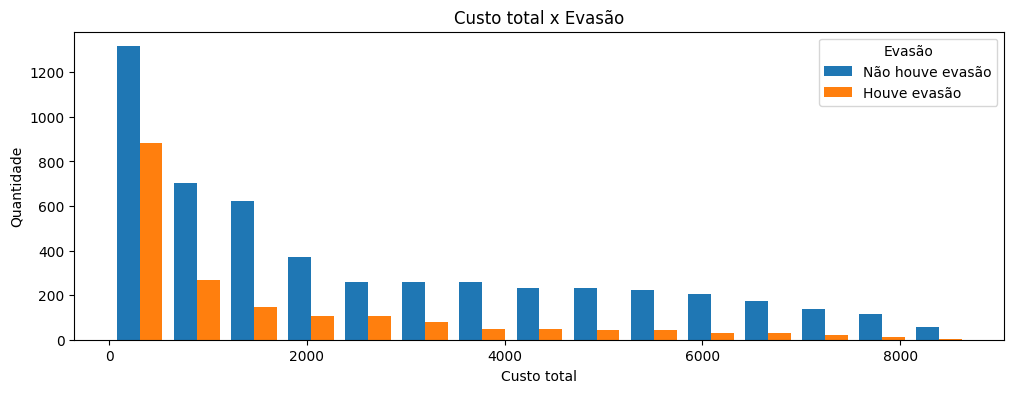

In [ ]:
evasao_total_nao = df[df['Churn'] == False]['Charges.Total']
evasao_total_sim = df[df['Churn'] == True]['Charges.Total']

plt.figure(figsize=(12,4))

plt.hist([evasao_total_nao, evasao_total_sim], bins=15, label=['Não houve evasão', 'Houve evasão'])
plt.xlabel('Custo total')
plt.ylabel('Quantidade')
plt.title('Custo total x Evasão')
plt.legend(title='Evasão')

plt.show()

### Contagem de Evasão por Variáveis Numéricas (Tempo)

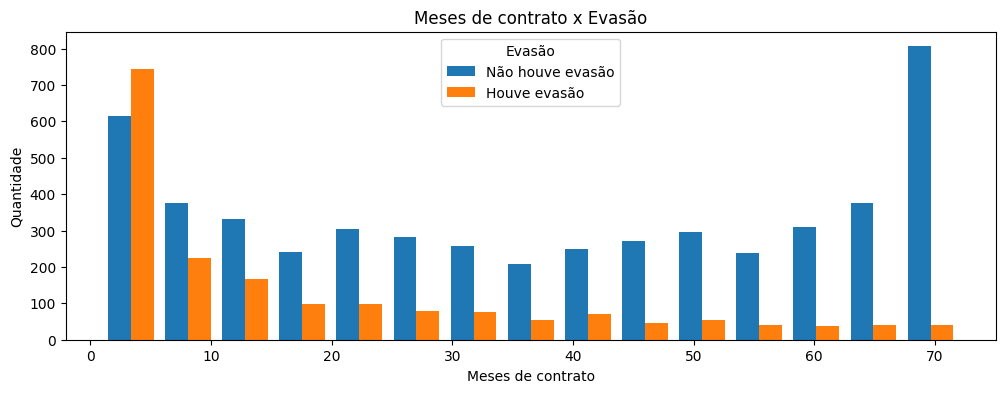

In [ ]:
evasao_meses_nao = df[df['Churn'] == False]['tenure']
evasao_meses_sim = df[df['Churn'] == True]['tenure']

plt.figure(figsize=(12,4))

plt.hist([evasao_meses_nao, evasao_meses_sim], bins=15, label=['Não houve evasão', 'Houve evasão'])
plt.xlabel('Meses de contrato')
plt.ylabel('Quantidade')
plt.title('Meses de contrato x Evasão')
plt.legend(title='Evasão')

plt.show()

## Relatório

### Introdução

A análise tem como objetivo explorar as informaçoes de um dataset de clientes de uma empresa que está sofrendo um problema de evasão desses clientes. A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

### Limpeza e Tratamento de Dados

Eu importei o dados do seguinte repositório no github: [Repositório](https://github.com/ingridcristh/challenge2-data-science/blob/main/TelecomX_Data.json).

Os seguintes passos foram seguidos para a limpeza e tratamento de dados:

*   O dataset possuía formato JSON, entretanto haviam dados aninhados, então os normalizei.

*   Reorganizei os nomes das colunas provenientes da normalização do dataset.

*   Padronizei dados que possuíam incoerência, por exemplo, dados que possuíam mais de uma string representando o mesmo valor. Além disso, converti valores textuais binários (como "Sim" e "Não") em booleanos.



### Análise Exploratória de Dados

Analisei os dados da seguinte forma:

Primeiro calculei alguns índices, a fim de entender a distribuição dos dados.
*   **Média, mediana e desvio padrão dos custos mensais.**
*   **Média, mediana e desvio padrão dos meses de contrato.**


Após isso, busquei identificar a relação entre alguns atributos na distribuição da evasão, tentando entender quais informações eram mais relevantes no problema da evasão de clientes.

Distribuição da evasão por variáveis categóricas:
*   **Gênero x Evasão**
*   **Tipo de contrato x Evasão**
*   **Serviço de internet x Evasão**
*   **Método de pagamento x Evasão**

Também busquei a relação entre variáveis numéricas e a distribuição da evasão:
*   **Custo mensal x Evasão**
*   **Custo total x Evasão**
*   **Meses de contrato x Evasão**

### Conclusões e Insights

Levando em consideração as relações entre os atributos que foram pesquisadas durante a fase de análise exploratória, cheguei a algumas conclusões:

**1. Tempo de contrato**

*   **Tipo de contrato x Evasão**

    Creio que essa relação é importante, pois revela que clientes com o contrato mensal costumam abandonar a empresa bem mais que os clientes com contrato mais extensos.

*   **Meses de contrato x Evasão**

    Além disso, a quantidade de meses que o cliente possui utilizando os serviçoes da empresa diminuem consideravelmente os índices de abandono, o que provavelmente se relaciona com o tipo de contrato que cada cliente tem.

In [ ]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

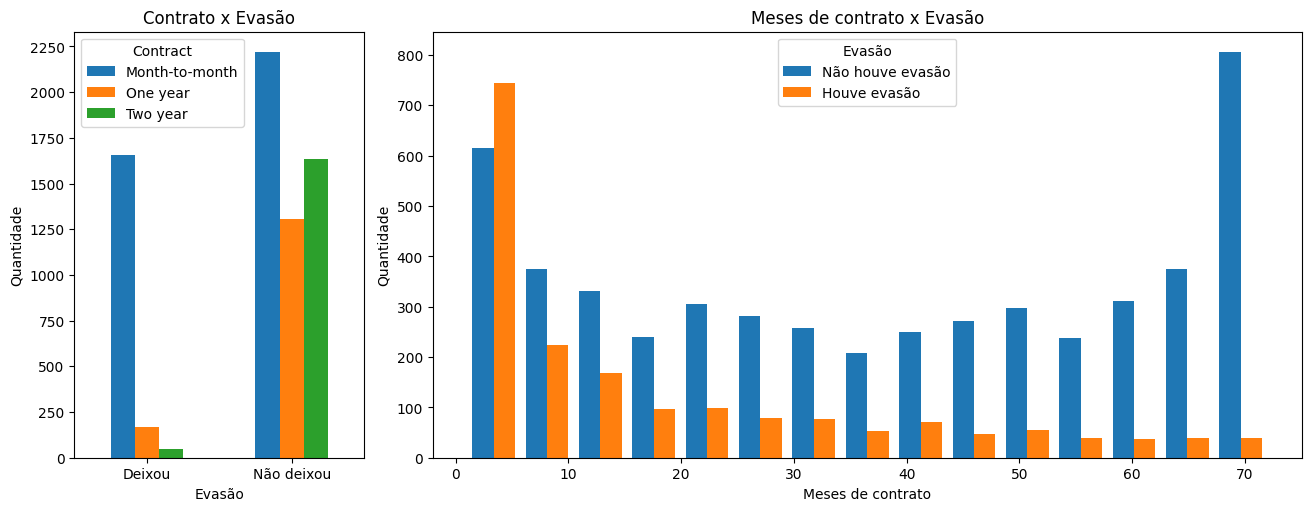

In [ ]:
fig = plt.figure(figsize=(13, 5), constrained_layout=True)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3], figure=fig)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ec = pd.crosstab(evasao, df['Contract'])
ec.plot(kind='bar', ax=ax1)
ax1.set_title('Contrato x Evasão')
ax1.set_xlabel('Evasão')
ax1.set_ylabel('Quantidade')
ax1.tick_params(axis='x', rotation=0)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

evasao_m_nao = df[df['Churn'] == False]['tenure']
evasao_m_sim = df[df['Churn'] == True]['tenure']
ax2.hist([evasao_meses_nao, evasao_meses_sim], bins=15, label=['Não houve evasão', 'Houve evasão'])
ax2.set_title('Meses de contrato x Evasão')
ax2.set_xlabel('Meses de contrato')
ax2.set_ylabel('Quantidade')
ax2.legend(title='Evasão')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

**2. Serviço de internet x Evasão**

   Podemos ver que a quantidade de usuários de fibra óptica que abandonaram a empresa é proporcionalmente maior que a de outros serviços de internet.

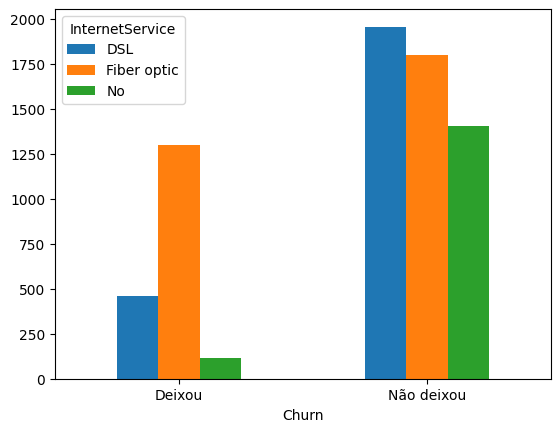

In [ ]:
ei = pd.crosstab(evasao, df['InternetService'])

ei.plot(kind='bar')
plt.xticks(rotation=0)

plt.show()

**3. Método de pagamento**

É possível ver que os clientes que utilizavam cheque eletrônico como método de pagamento abandonam muito mais os serviços da empresa do que os clientes que optavam por outros métodos.

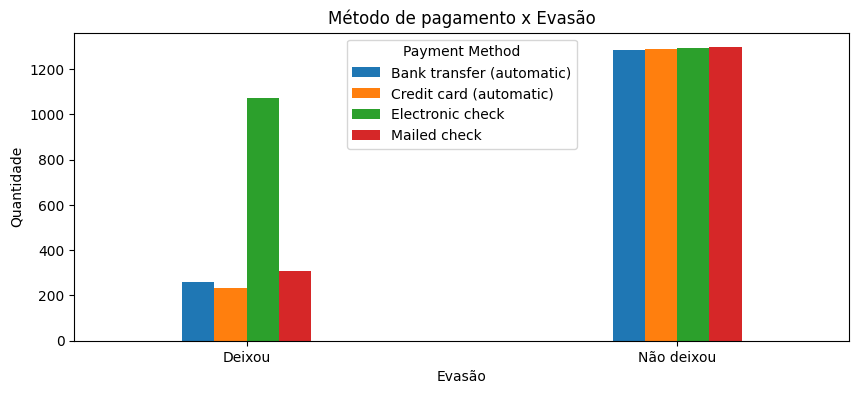

In [ ]:
ep = pd.crosstab(evasao, df['PaymentMethod'])

ep.plot(kind='bar', figsize=(10, 4), width=0.3)
plt.title('Método de pagamento x Evasão')
plt.xlabel('Evasão')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

plt.legend(title='Payment Method', loc='upper center')
plt.show()

### Recomendações

Levando em consideração tudo que foi exposto na conclusão através das informações obtidas na fase de análise, tenho as seguintes recomendações:

* **Tempo de Contrato**: Clientes com contratos de curto prazo (mês a mês) têm uma taxa de Churn significativamente maior. Recomenda-se a criação de ofertas e incentivos para que os clientes optem por contratos mais longos.
* **Serviço de Internet**: O serviço de fibra óptica está associado a uma alta taxa de Churn, sugerindo que há insatisfação específica com este serviço. É recomendado investigar a qualidade e os problemas relacionados a este serviço.
* **Método de Pagamento**: Clientes que usam cheque eletrônico são os que mais cancelam. A empresa deve analisar as causas por trás da insatisfação desses clientes, podendo ser problemas no processo de pagamento ou outros fatores que influenciam sua decisão.
